# Hybrid Images

*image preprocessing*, *hybrid images*

**Problem**

In this problem, we want to create hybrid images using the approach described in the SIGGRAPH 2006 paper by Oliva, Torralba, and Schyns. 

**Method**

Hybrid images are static images that change in interpretation as a function of the viewing distance. The basic idea is that high frequency tends to dominate perception when it is available, but, at a distance, only the low frequency (smooth) part of the signal can be seen. By blending the high frequency portion of one image with the low-frequency portion of another, you get a hybrid image that leads to different interpretations at different distances.

In [1]:
import numpy as np
import pandas as pd
from math import floor
import scipy.ndimage as ndi
from PIL import Image, ImageOps
from sklearn.cluster import k_means
import math
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6, 4)

In [20]:
# load images
image1 = plt.imread('images/Camera-1.jpg')
image2 = plt.imread('images/eye-1.jpg')

In [36]:
# kernels 
kernels = {
    'Gaussian': 1/16 * np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]),
    'Laplacian': np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]),
    'Denoise': 1/9 * np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]),
    'Sharpen': np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]),
    'Sobel': np.array([[1, 2, 1],[ 0, 0, 0],[-1, -2, -1]] )/8,
    'Prewitt': np.array([[-1, 0, 1],[ -1, 0, 1],[-1, 0, 1]] )
}

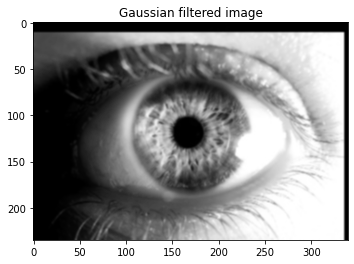

In [22]:
# Step 1 Low pass filter 
image2_low = ndi.convolve(image2, kernels['Gaussian'])
plt.imshow(image2_low, cmap='gray')
plt.title('Gaussian filtered image')
plt.show()

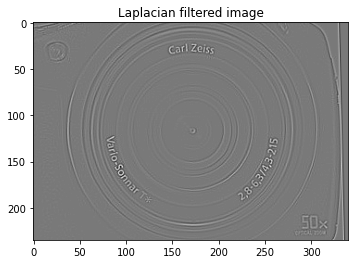

In [54]:
# Step 2 Laplacian filter
image1_low = ndi.convolve(image1, kernels['Gaussian'])
image1_high = image1 - image1_low 
#image1_high = np.maximum(np.minimum(image1_high, 255), 0).astype(int)
plt.imshow(image1_high, cmap='gray')
plt.title('Laplacian filtered image')
plt.show()
# note that the resulting image may have negative values 

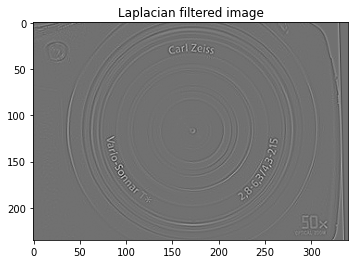

In [55]:
# solution 2, directly apply laplacian kernel 
t = ndi.convolve(image1, kernels['Laplacian'])
plt.imshow(t, cmap='gray')
plt.title('Laplacian filtered image')
plt.show()

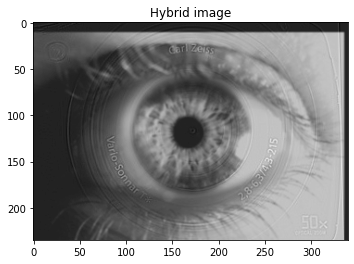

In [39]:
# Step 3. hybrid image (subtracting Gaussian from original)
image3 = ((image1_high + image2_low) / 2).astype(int)
plt.imshow(image3, cmap='gray')
plt.title('Hybrid image')
plt.show()

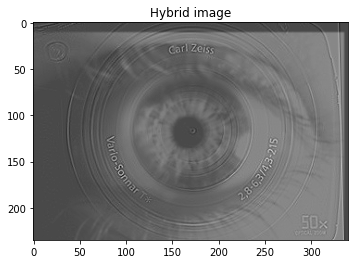

In [56]:
# solution2. hybrid image (using Laplacian kernel)
image3 = ((t + image2_low) / 2).astype(int)
plt.imshow(image3, cmap='gray')
plt.title('Hybrid image')
plt.show()

When looking at a close distance, we can see the camera because the eye is blurry. When looking far away, we can see the eye. 